In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA

cwd = os.getcwd()
cwd

plt.rcParams["figure.dpi"] = 200
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
SCOPE = 100

In [2]:
test = pd.DataFrame([(0.0, np.nan, -1.0, 1.0),
                   (np.nan, 2.0, -2.0, np.nan),
                   (3.0, 3.0, np.nan, 9.0),
                   (np.nan, 4.0, -4.0, np.nan),
                   (5.0, 5.0, np.nan, 25.0),
                   (np.nan, 4.0, -9.0, np.nan),
                   (np.nan, 5.0, np.nan, 49.0),
                   (np.nan, 5.0, np.nan, 49.0),
                   (np.nan, 5.0, np.nan, 49.0),
                   (np.nan, 5.0, np.nan, 49.0),
                   (np.nan, 5.0, np.nan, 49.0),
                   (np.nan, 5.0, np.nan, 49.0),
                   (np.nan, 5.0, np.nan, 49.0),
                   (35.0, 5.0, -90.0, 49.0)],
                  columns=list('abcd'))
#test

In [3]:
#test.interpolate(method='linear', axis=0, limit=5, limit_direction='forward')
#test.interpolate(method='polynomial', order=2)
#test.fillna(method='ffill', inplace=True, limit=5)

In [4]:
download = f'./../../Data/5Gdataset-master/5G-production-dataset/Download/Driving/'
#download = f'/work/bde/Data/5Gdataset-master/5G-production-dataset/Netflix/Driving/Season3-StrangerThings/'
df_list = []
file_dir = download

for file in os.listdir(file_dir)[:]:
    #print(file)
    df = pd.read_csv(file_dir+file)
    #print(df.info())
    
    df = df[['Timestamp', 'Speed', 'CellID', 'RSRP', 'RSRQ', 'SNR', 'CQI', 'RSSI', 'DL_bitrate', 'UL_bitrate', 'NRxRSRP', 'NRxRSRQ']]#, 'Longitude', 'Latitude']]
    df = df.replace('-', np.nan)
    
    df['date'] = pd.to_datetime(df['Timestamp'], format="%Y.%m.%d_%H.%M.%S")
    df = df.drop(columns=['Timestamp'])

    df['CellID'] = pd.to_numeric(df['CellID'])
    df['RSRP'] = pd.to_numeric(df['RSRP'])
    df['RSRQ'] = pd.to_numeric(df['RSRQ'])
    df['SNR'] = pd.to_numeric(df['SNR'])
    df['CQI'] = pd.to_numeric(df['CQI'])
    df['RSSI'] = pd.to_numeric(df['RSSI'])
    df['DL_bitrate'] = pd.to_numeric(df['DL_bitrate'])
    df['UL_bitrate'] = pd.to_numeric(df['UL_bitrate'])
    df['NRxRSRP'] = pd.to_numeric(df['NRxRSRP'])
    df['NRxRSRQ'] = pd.to_numeric(df['NRxRSRQ'])

    #df.interpolate(method='linear', limit_direction='both', axis=0, inplace=True)
    #df.fillna(method='ffill', inplace=True)
    df = df.ffill(limit=5)
    df = df.fillna(0)

    df = df.sort_values('date')
    df = df.drop_duplicates(subset=['date'])
    #df.info()
    #df.info(show_counts=True)
    #print(df.head())
    #df.plot(subplots=True, layout=(3,3), figsize=(40, 25))
    #df.to_csv('5Gdataset-{}.csv'.format(file), encoding='utf-8', index=False)
    df_list.append(df)

/tmp/ipykernel_1252365/2957828530.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('-', np.nan)


In [5]:
df = pd.concat(df_list, axis=0)

In [6]:
df.sort_values('date', inplace=True)
df.reset_index(drop=True, inplace=True)
#df = df.set_index('date', drop=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24446 entries, 0 to 24445
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Speed       24446 non-null  int64         
 1   CellID      24446 non-null  int64         
 2   RSRP        24446 non-null  int64         
 3   RSRQ        24446 non-null  float64       
 4   SNR         24446 non-null  float64       
 5   CQI         24446 non-null  float64       
 6   RSSI        24446 non-null  float64       
 7   DL_bitrate  24446 non-null  int64         
 8   UL_bitrate  24446 non-null  int64         
 9   NRxRSRP     24446 non-null  float64       
 10  NRxRSRQ     24446 non-null  float64       
 11  date        24446 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(5)
memory usage: 2.2 MB


In [7]:
# Calculate mean and standard deviation
mean_value = df['DL_bitrate'].div(1024).mean()
std_value = df['DL_bitrate'].div(1024).std()

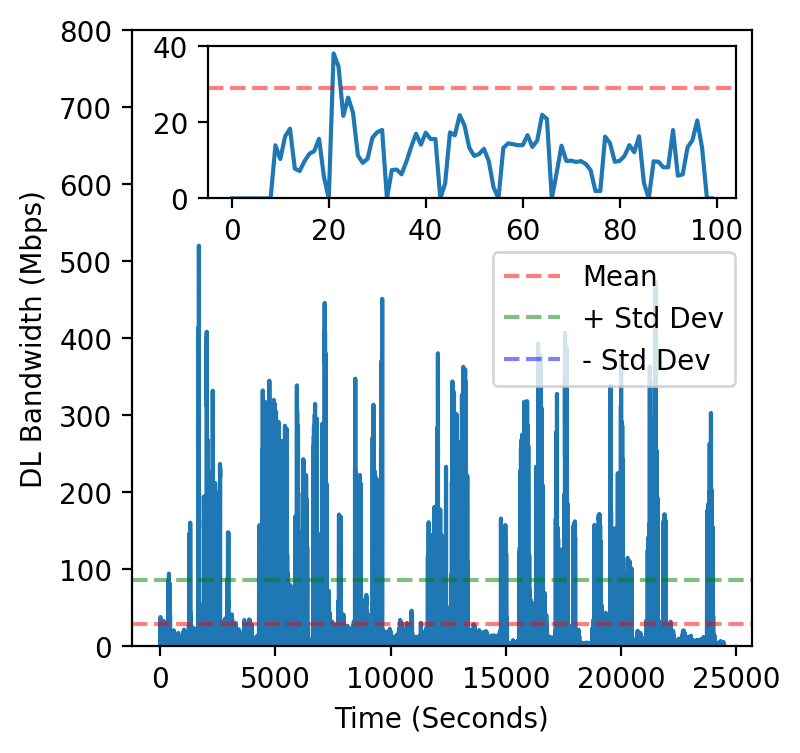

In [8]:
figure_size = (4, 4)
fig, ax1 = plt.subplots(figsize=figure_size, dpi=200)
ax1.set_xlabel('Time (Seconds)')
ax1.set_ylabel('DL Bandwidth (Mbps)')
ax1.set_ylim(bottom=0, top=800)

left, bottom, width, height = [0.22, 0.67, 0.66, 0.19]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.set_ylim(bottom=0, top=40)

ax1.plot(df['DL_bitrate'].div(1024))

alpha_val = 0.5
# Plot mean and standard deviation lines on ax1
ax1.axhline(mean_value, color='r', linestyle='--', alpha=alpha_val, label='Mean')
ax1.axhline(mean_value + std_value, color='g', linestyle='--', alpha=alpha_val, label='+ Std Dev')
ax1.axhline(mean_value - std_value, color='b', linestyle='--', alpha=alpha_val, label='- Std Dev')

# Add legend
ax1.legend(loc='lower left', bbox_to_anchor=(0.56, 0.4))

ax2.plot(df['DL_bitrate'].div(1024)[:100])
# Plot mean and standard deviation lines on ax2
ax2.axhline(mean_value, color='r', linestyle='--', alpha=alpha_val, label='Mean')
ax2.axhline(mean_value + std_value, color='g', linestyle='--', alpha=alpha_val, label='+ Std Dev')
ax2.axhline(mean_value - std_value, color='b', linestyle='--', alpha=alpha_val, label='- Std Dev')
fig.savefig(f'plots/Beyond5G-data.pdf', bbox_inches='tight')
plt.show()

In [9]:
df['DL_bitrate'].div(1024).describe()

count    24446.000000
mean        28.947031
std         57.399362
min          0.000000
25%          3.012695
50%          8.698242
75%         20.155762
max        520.415039
Name: DL_bitrate, dtype: float64

In [10]:
df.describe()

,Speed,CellID,RSRP,RSRQ,SNR,CQI,RSSI,DL_bitrate,UL_bitrate,NRxRSRP,NRxRSRQ,date
count,24446.000000,24446.000000,24446.000000,24446.000000,24446.000000,24446.000000,24446.000000,24446.000000,24446.000000,24446.000000,2.444600e+04,24446
mean,32.271046,5600.478442,-82.260124,-10.055346,4.338297,8.826597,-69.521312,29641.759347,112.115929,-74.650945,7.739233e+07,2020-01-17 22:23:23.760124416
min,0.000000,1.000000,-200.000000,-22.000000,-30.000000,0.000000,-113.000000,0.000000,0.000000,-125.000000,-2.040000e+02,2019-12-14 10:16:30
25%,21.000000,2.000000,-92.000000,-13.000000,0.000000,6.000000,-93.000000,3085.000000,51.000000,-94.000000,-1.600000e+01,2019-12-16 14:48:09.249999872
50%,33.000000,12.000000,-83.000000,-11.000000,2.000000,10.000000,-79.000000,8907.000000,89.000000,-83.000000,-1.200000e+01,2020-01-16 10:11:57.500000
75%,43.000000,13.000000,-73.000000,-8.000000,9.000000,13.000000,-61.000000,20639.500000,156.000000,-64.000000,-3.000000e+00,2020-02-13 15:57:07.750000128
max,89.000000,57666.000000,-49.000000,0.000000,35.000000,15.000000,0.000000,532905.000000,1626.000000,0.000000,2.147484e+09,2020-02-27 20:50:06
std,15.815427,14743.332635,13.080832,5.031405,8.146451,4.782929,33.729054,58776.946871,95.222776,28.889185,4.002696e+08,NaN


In [11]:
df.head()

,Speed,CellID,RSRP,RSRQ,SNR,CQI,RSSI,DL_bitrate,UL_bitrate,NRxRSRP,NRxRSRQ,date
0,0,12,-99,-15.0,6.0,12.0,-90.0,7,1,-100.0,-15.0,2019-12-14 10:16:30
1,1,12,-99,-15.0,6.0,12.0,-90.0,7,1,-100.0,-15.0,2019-12-14 10:16:31
2,1,12,-102,-14.0,6.0,12.0,-90.0,0,0,-99.0,-15.0,2019-12-14 10:16:32
3,1,12,-102,-14.0,6.0,12.0,-90.0,9,12,-99.0,-15.0,2019-12-14 10:16:33
4,1,12,-102,-14.0,4.0,12.0,-90.0,0,0,-99.0,-14.0,2019-12-14 10:16:34


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24446 entries, 0 to 24445
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Speed       24446 non-null  int64         
 1   CellID      24446 non-null  int64         
 2   RSRP        24446 non-null  int64         
 3   RSRQ        24446 non-null  float64       
 4   SNR         24446 non-null  float64       
 5   CQI         24446 non-null  float64       
 6   RSSI        24446 non-null  float64       
 7   DL_bitrate  24446 non-null  int64         
 8   UL_bitrate  24446 non-null  int64         
 9   NRxRSRP     24446 non-null  float64       
 10  NRxRSRQ     24446 non-null  float64       
 11  date        24446 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(5)
memory usage: 2.2 MB


In [13]:
#df.to_csv('data/5Gdataset/Download.csv', encoding='utf-8', index=False)
#df.drop(columns=['date']).to_csv('/work/bde/Data/5Gdataset-single/Download.csv', encoding='utf-8', index=False)

In [14]:
# Speed	   -0.101103	-0.116020	-0.079080	-0.098734
# NRxRSRQ	0.084796	-0.026925	-0.016587	0.013761
# NRxRSRP	-0.100624	-0.092604	-0.051779	-0.081669

df_limited = df.drop(columns=['NRxRSRP', 'NRxRSRQ'])
df_limited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24446 entries, 0 to 24445
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Speed       24446 non-null  int64         
 1   CellID      24446 non-null  int64         
 2   RSRP        24446 non-null  int64         
 3   RSRQ        24446 non-null  float64       
 4   SNR         24446 non-null  float64       
 5   CQI         24446 non-null  float64       
 6   RSSI        24446 non-null  float64       
 7   DL_bitrate  24446 non-null  int64         
 8   UL_bitrate  24446 non-null  int64         
 9   date        24446 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(5)
memory usage: 1.9 MB


In [15]:
#df_limited.to_csv('data/5Gdataset/Download-limited.csv', encoding='utf-8', index=False)
#df_limited.drop(columns=['date']).to_csv('/work/bde/Data/5Gdataset-single/Download-limited.csv', encoding='utf-8', index=False)

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
def multi_corr(df, feature):
    fig, ax = plt.subplots(1,3, figsize=(14, 6), dpi=300)

    # when the Pearson and Spearman values are not much different, 
    # our data tends to not have extreme values (outliers)
    corr1 = df.corr('pearson')[[feature]].sort_values(by=feature, ascending=False)
    corr2 = df.corr('spearman')[[feature]].sort_values(by=feature, ascending=False)

    corr3 = df.corr('kendall')[[feature]].sort_values(by=feature, ascending=False)
    #ordinal correlation (Spearman & Kendall Tau)

    sns.heatmap(corr1, ax=ax[0], annot=True)
    sns.heatmap(corr2, ax=ax[1], annot=True)
    sns.heatmap(corr3, ax=ax[2], annot=True)

    return corr1, corr2, corr3

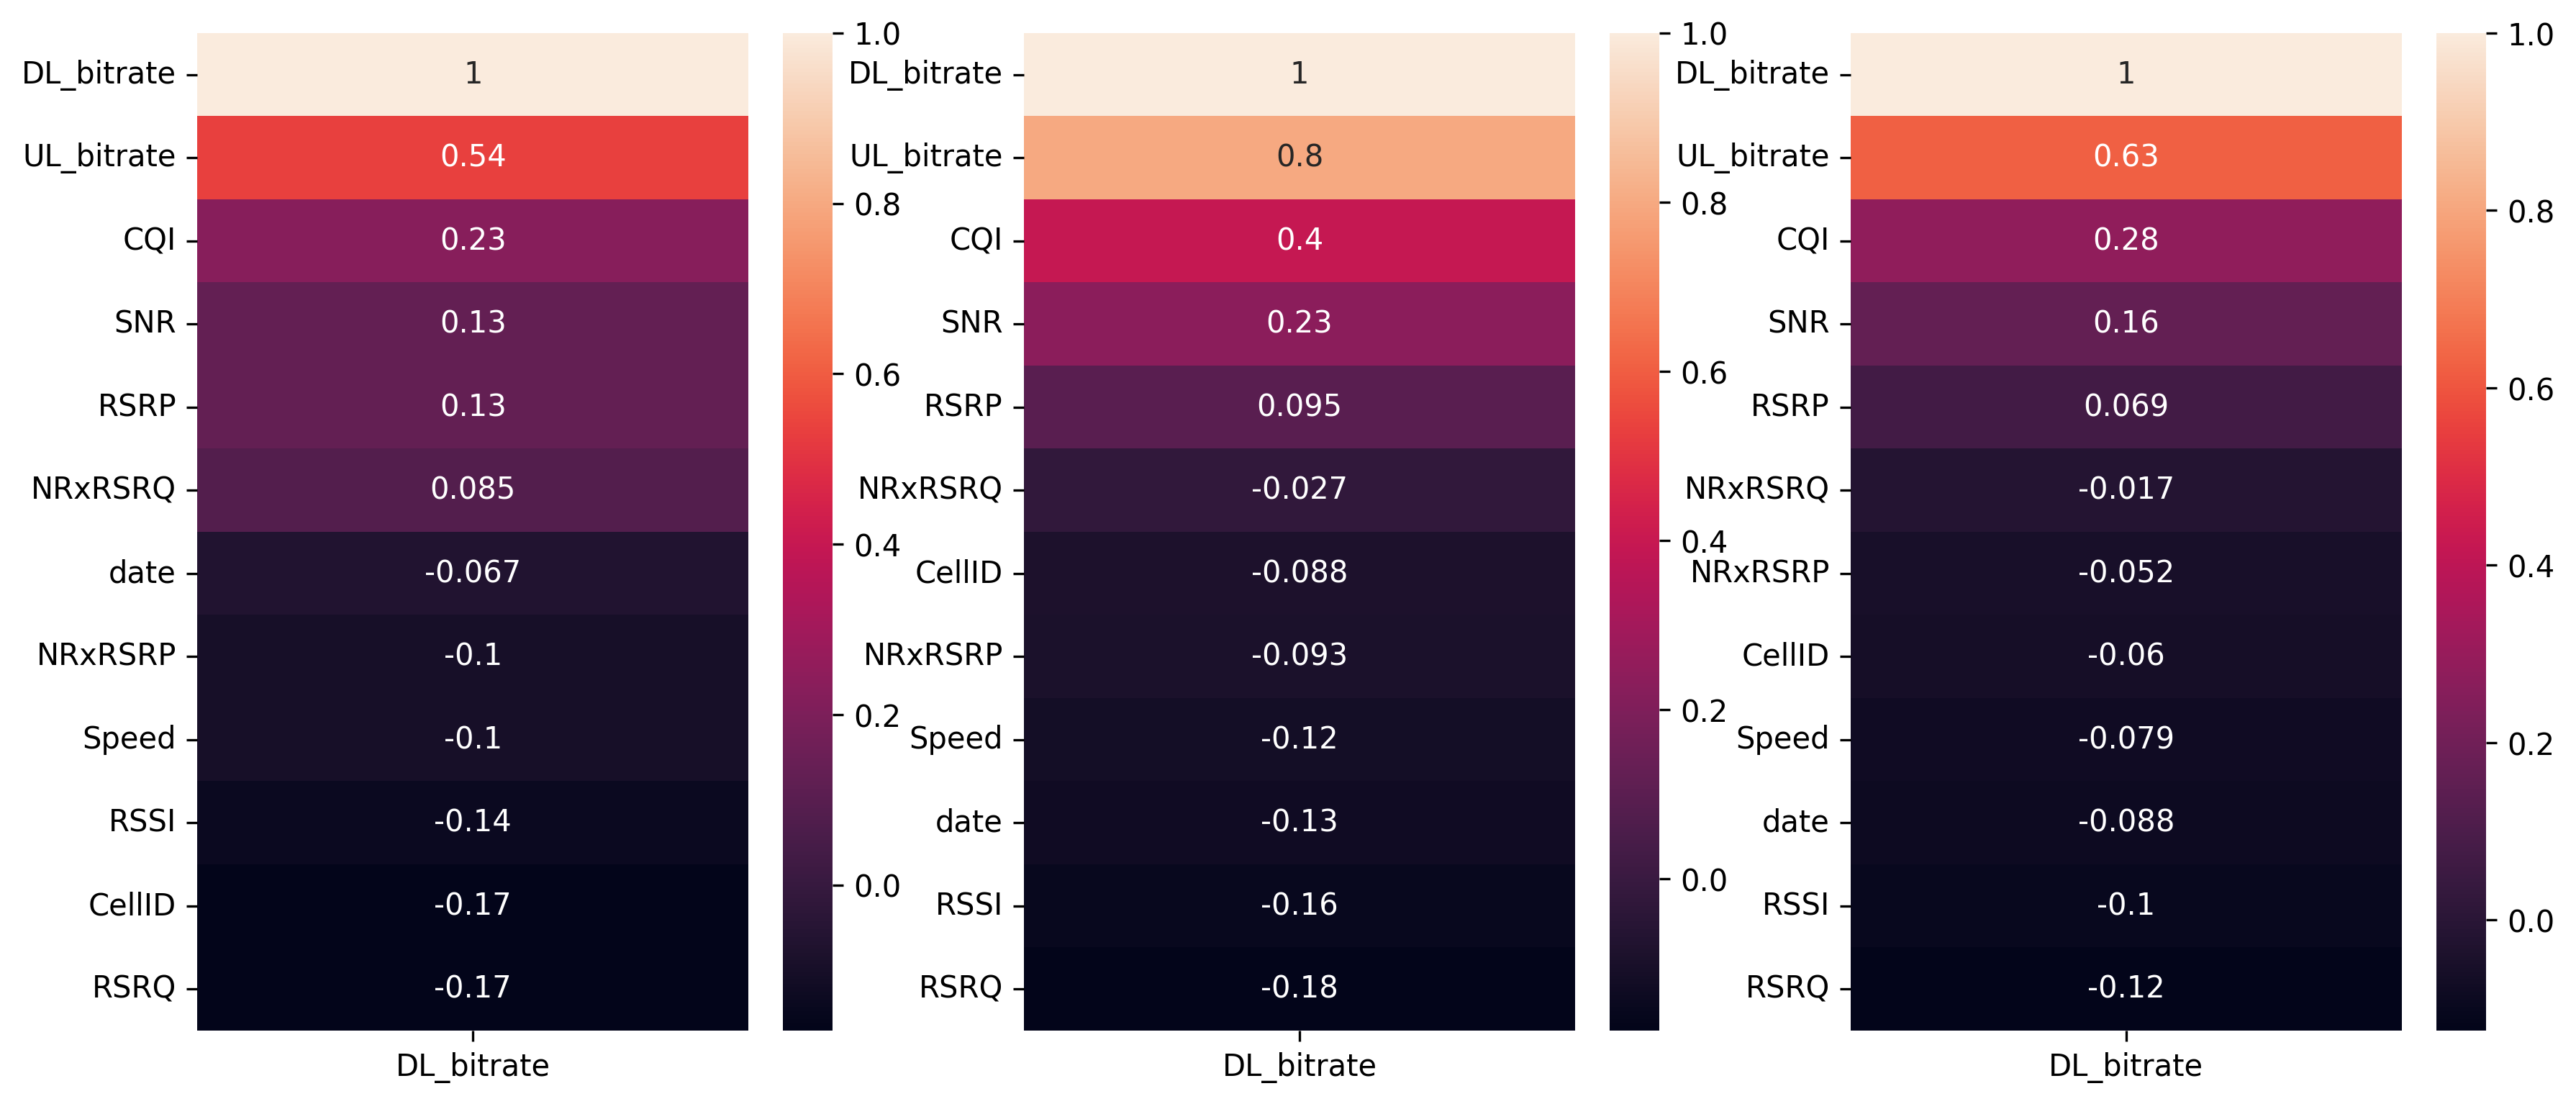

In [18]:
corr1, corr2, corr3 = multi_corr(df, 'DL_bitrate')

In [19]:
corr1['corr1'] = corr1
corr1['corr2'] = corr2
corr1['corr3'] = corr3

df_corr = corr1[['corr1', 'corr2', 'corr3']]
df_corr['average'] = df_corr.mean(axis=1)
df_corr

,corr1,corr2,corr3,average
DL_bitrate,1.000000,1.000000,1.000000,1.000000
UL_bitrate,0.536888,0.798079,0.626604,0.653857
CQI,0.229046,0.395637,0.281029,0.301904
SNR,0.129540,0.233738,0.161802,0.175027
RSRP,0.127124,0.094679,0.068900,0.096901
NRxRSRQ,0.084796,-0.026925,-0.016587,0.013761
date,-0.067468,-0.129775,-0.087590,-0.094944
NRxRSRP,-0.100624,-0.092604,-0.051779,-0.081669
Speed,-0.101103,-0.116020,-0.079080,-0.098734
RSSI,-0.135354,-0.155984,-0.101709,-0.131015


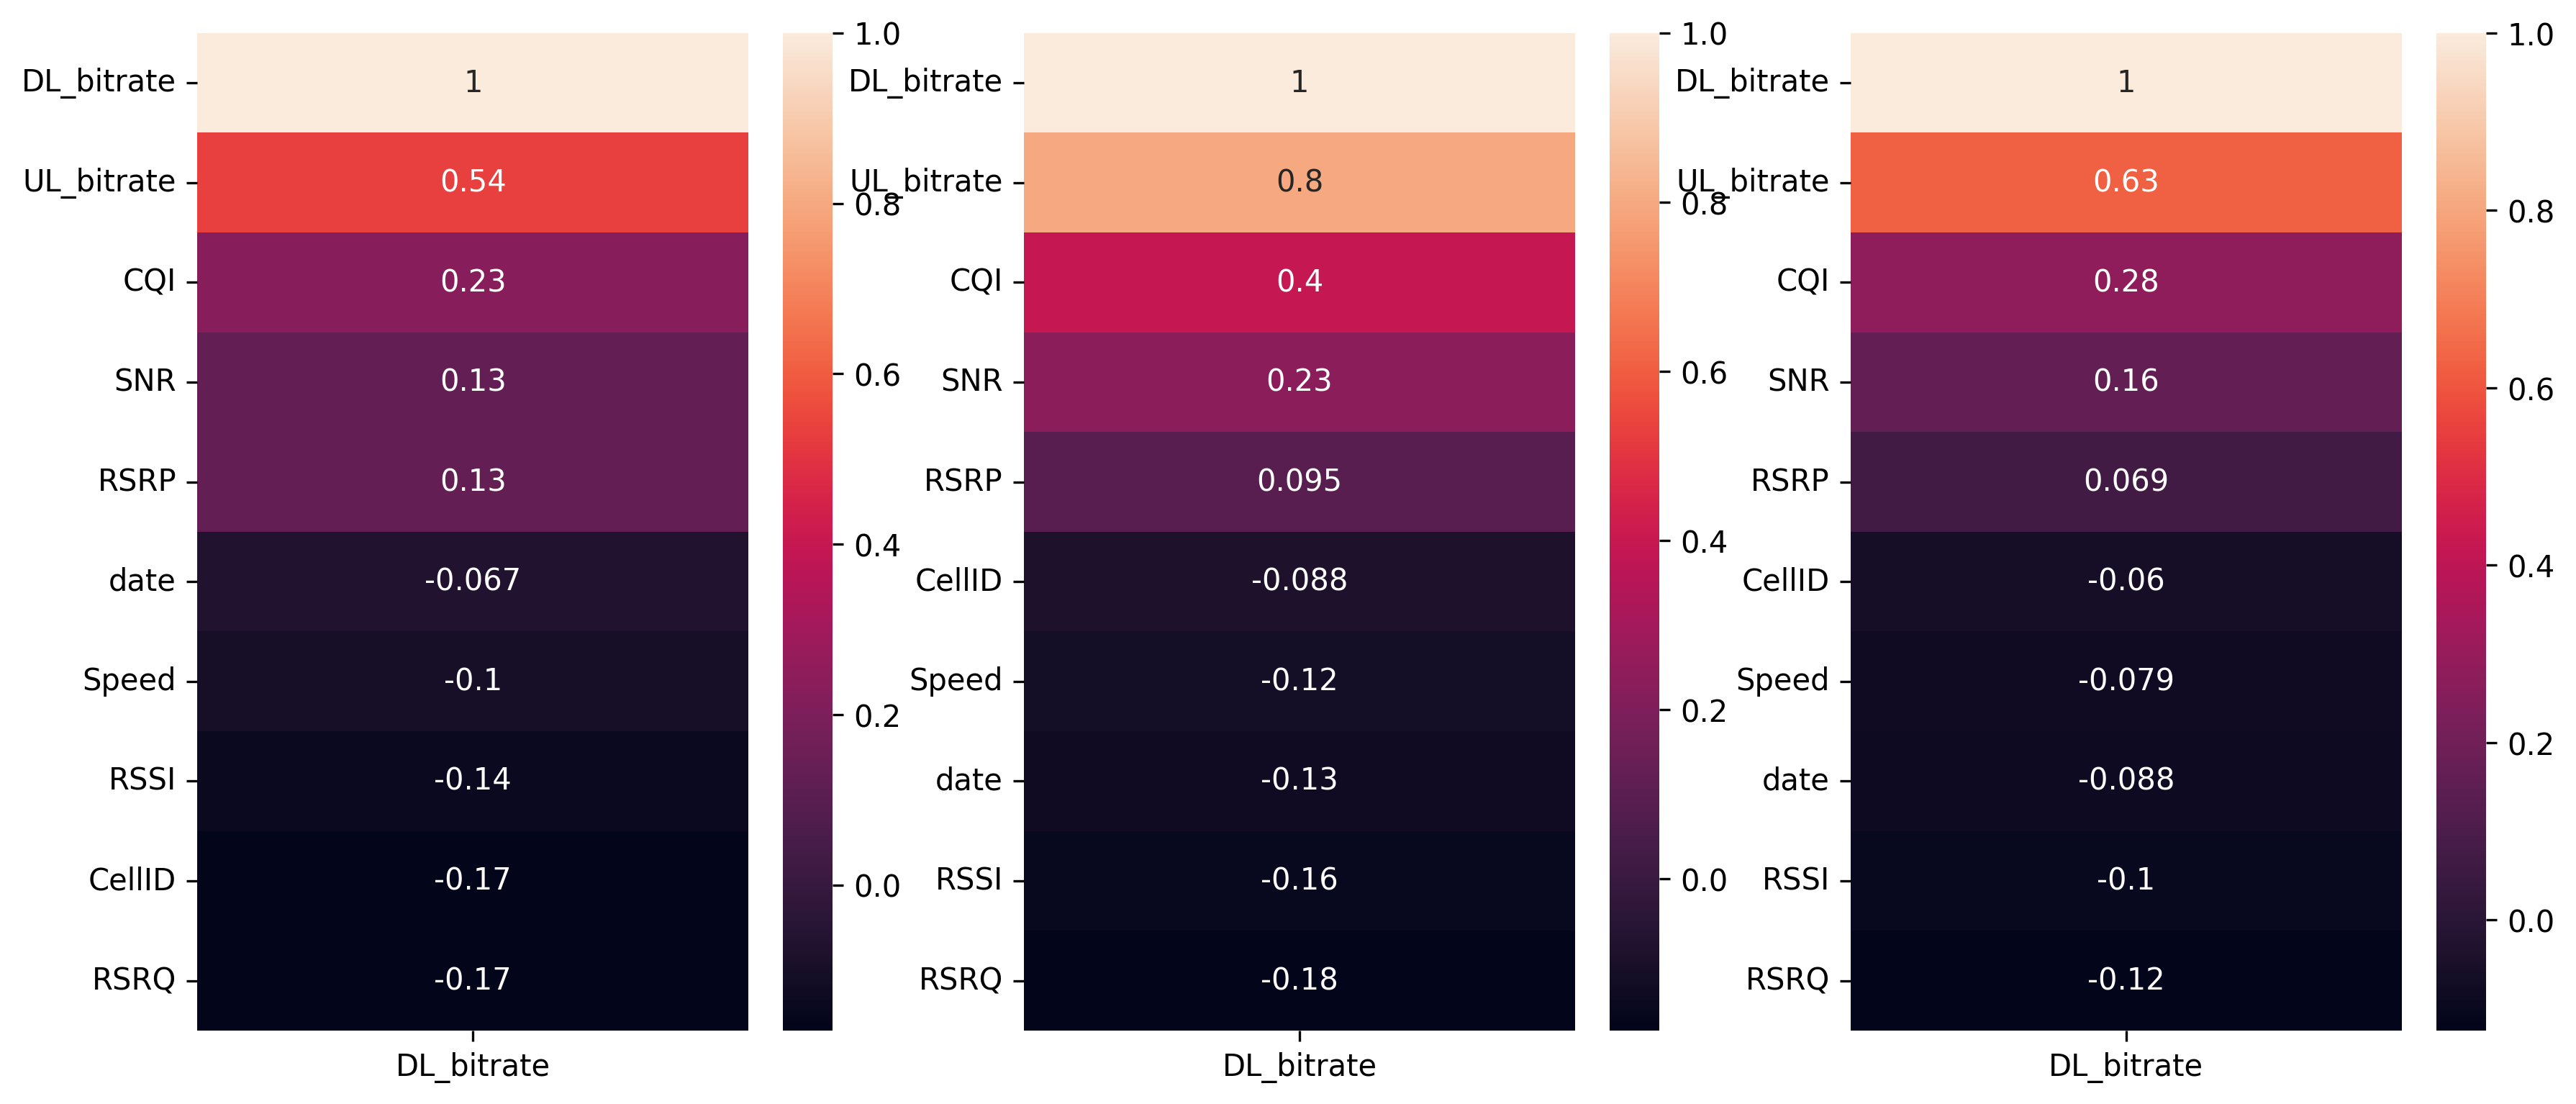

In [20]:
corr1_lim, corr2_lim, corr3_lim = multi_corr(df_limited, 'DL_bitrate')

In [21]:
corr1_lim['corr1'] = corr1_lim
corr1_lim['corr2'] = corr2_lim
corr1_lim['corr3'] = corr3_lim

df_corr_lim = corr1_lim[['corr1', 'corr2', 'corr3']]
df_corr_lim['average'] = df_corr_lim.mean(axis=1)
df_corr_lim

,corr1,corr2,corr3,average
DL_bitrate,1.000000,1.000000,1.000000,1.000000
UL_bitrate,0.536888,0.798079,0.626604,0.653857
CQI,0.229046,0.395637,0.281029,0.301904
SNR,0.129540,0.233738,0.161802,0.175027
RSRP,0.127124,0.094679,0.068900,0.096901
date,-0.067468,-0.129775,-0.087590,-0.094944
Speed,-0.101103,-0.116020,-0.079080,-0.098734
RSSI,-0.135354,-0.155984,-0.101709,-0.131015
CellID,-0.168014,-0.087570,-0.059953,-0.105179
RSRQ,-0.170837,-0.179033,-0.124474,-0.158115


In [22]:
df = df[['DL_bitrate']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24446 entries, 0 to 24445
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   DL_bitrate  24446 non-null  int64
dtypes: int64(1)
memory usage: 191.1 KB


In [23]:
df.head()

,DL_bitrate
0,7
1,7
2,0
3,9
4,0


In [24]:
df['bandwidth'] = df[['DL_bitrate']]
tail = df[['bandwidth']]

In [25]:
""" label_scaler = StandardScaler()
label_scaler.fit(df.values)

data = label_scaler.transform(df.values)
data = data.flatten()
print(data.shape)

tail = pd.DataFrame({'bandwidth': data})
tail.head() """

" label_scaler = StandardScaler()\nlabel_scaler.fit(df.values)\n\ndata = label_scaler.transform(df.values)\ndata = data.flatten()\nprint(data.shape)\n\ntail = pd.DataFrame({'bandwidth': data})\ntail.head() "

In [26]:
len(df) * 0.2
scope = 4889

In [27]:
tail = df.tail(scope)
tail = tail[['bandwidth']]

In [28]:
span = 8
pred_len = 3

truth = []
ewma8 = []
shifted = []

tail['EWMA8'] = tail['bandwidth'].ewm(span=span, min_periods=8, adjust=True).mean()

b_truth  = tail['bandwidth'].to_numpy()
b_ewma8 = tail['EWMA8'].to_numpy()

for i in range(len(b_truth) - span - pred_len):
    truth.append(b_truth[(i+span):(i+span+pred_len)])
    ewma8.append(np.repeat(b_ewma8[i+span-1], pred_len)) #correct?
    #ewma8.append(np.repeat(b_ewma8[i+span-0], pred_len)) #informer
    shifted.append(np.repeat(b_truth[i+span-1], pred_len))

#EWMA
rmse = root_mean_squared_error(truth, ewma8)
mae = mean_absolute_error(truth, ewma8)
print(f'EWMA8 rmse: {rmse}, mae: {mae}')

#Shifted
rmse = root_mean_squared_error(truth, shifted)
mae = mean_absolute_error(truth, shifted)
print(f'Shifted rmse: {rmse}, mae: {mae}')

EWMA8 rmse: 37273.079473442696, mae: 15475.68388172963
Shifted rmse: 36135.531003509765, mae: 13332.52507858412


In [29]:
scope = 4889 + 32
tail_arima = df.tail(scope).tail(scope)
tail_arima = tail_arima[['bandwidth']]

In [30]:
# ARIMA model parameters (p, d, q)
p = 1  # AutoRegressive (AR) order
d = 1  # Differencing (I) order
q = 0  # Moving Average (MA) order

# Function to predict next value using ARIMA model
def predict_next_value(data, window_size=32, horizon=1):
    predictions = []
    for i in range(len(data) - window_size):
        window = data.iloc[i:i+window_size]  # Accessing by index using iloc
        model = ARIMA(window, order=(p, d, q))  # Example ARIMA model, you may need to adjust the parameters
        model_fit = model.fit()
        next_value = model_fit.forecast(steps=horizon)  # Extracting the forecasted value
        #print(type(next_value.values))
        #print((next_value.values))
        #print((next_value.iloc[0]))
        predictions.append(next_value.values)
        #predictions.append(next_value.iloc[0])
    return predictions

# Define the rolling window size and prediction horizon
window_size = 32
prediction_horizon = 3

# Predict the next value using ARIMA model with a rolling window
predictions = predict_next_value(tail_arima['bandwidth'], window_size=window_size, horizon=prediction_horizon)

/data22/bde/.pyenv/versions/informer/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/data22/bde/.pyenv/versions/informer/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/data22/bde/.pyenv/versions/informer/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/data22/bde/.pyenv/versions/informer/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found.

In [31]:
print(f'len(predictions): {len(predictions)}')
print(f'len(predictions[0]): {len(predictions[0])}')
#print(f'predictions[0]: {(predictions[0])}')

# Evaluate the predictions
actual_values = tail_arima['bandwidth']
#actual_values = tail_arima['datarate'].iloc[window_size:]
print(f'len(actual_values): {len(actual_values)}')

arima_labels = []
for i in range(len(actual_values) - window_size - prediction_horizon + 1):
    #print(i)
    arima_labels.append(actual_values[(i+window_size):(i+window_size+prediction_horizon)])

print(f'len(arima_labels): {len(arima_labels)}')
#print(f'len(arima_labels): {len(arima_labels[0])}')

#selected_arima_labels = arima_labels[-(len(predictions)):]
#print(f'len(selected_arima_labels): {len(selected_arima_labels)}')
#print(f'len(selected_arima_labels): {len(selected_arima_labels[0])}')

selected_predictions = predictions[:len(arima_labels)]
print(f'len(selected_predictions): {len(selected_predictions)}')

#ARIMA
rmse = root_mean_squared_error(arima_labels, selected_predictions)
mae = mean_absolute_error(arima_labels, selected_predictions)
print(f'ARIMA rmse: {rmse}, mae: {mae}')

len(predictions): 4889
len(predictions[0]): 3
len(actual_values): 4921
len(arima_labels): 4887
len(selected_predictions): 4887
ARIMA rmse: 38489.98218281805, mae: 14066.150741056073
